<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/Standard_banner.png' align='right' width='100%'/>

<a href="../Index.ipynb"><< Index</a>
<br>
<a href="./1_4_SRAL_tracks.ipynb"><< SRAL tracks</a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="./1_6_SRAL_SSHA.ipynb">SRAL sea surface height anomalies >></a>

<font color="#138D75">**Copernicus Marine Training Service**</font> <br>
**Copyright:** 2022 EUMETSAT <br>
**License:** MIT

<div class="alert alert-block alert-success">
<h3>Learn SRAL: Introductory</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>
    
The following modules are prerequisites for this notebook:
- **<a href="1_1_SRAL_data_access_HDA_Data_Store.ipynb" target="_blank">1_1_SRAL_data_access_HDA_Data_Store.ipynb</a>**; this will download the required SRAL products for this notebook.
    
</div>
<hr>

# 1.5 SRAL waveforms 


### Data used

| Product Description  | Data Store collection ID| Product Navigator | WEkEO HDA ID | WEkEO metadata |
|:--------------------:|:-----------------------:|:-------------:|:-----------------:|:--------:|
| Sentinel-3 SRAL level-1B | EO:EUM:DAT:0406 |<a href="https://navigator.eumetsat.int/product/EO:EUM:DAT:SENTINEL-3:SR_1_SRA___NTC?query=SRAL&s=advanced" target="_blank">link</a> | EO:EUM:DAT:SENTINEL-3:SR_1_SRA___ | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AEUM%3ADAT%3ASENTINEL-3%3ASR_1_SRA___" target="_blank">link</a> |

### Learning outcomes

At the end of this notebook you will know;
* Objective

### Outline

<div class="alert alert-info" role="alert">

## <a id='TOC_TOP'></a>Contents

</div>
 
 0. [A quick preamble on functions](#section0)
 1. [What are waveforms?](#section1)
 1. [Waveforms and modes](#section2)
 1. [Waveform changes by surface class](#section3)

<hr>

In [1]:
# library imports
import cartopy
import cmocean
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import os
import warnings

warnings.filterwarnings('ignore')
plt.rcParams.update({'font.size': 12})

<div class="alert alert-warning" role="alert">

## <a id='section0'></a>0. A quick preamble on functions
[Back to top](#TOC_TOP)

</div>

In [ ]:
def norm(y):
    """Quick exponential scaled, normalisation function"""
    y_scale = np.nan
    if np.isfinite(np.nanmax(y)):
        y_scale = int(np.log10(np.nanmax(y)))
    y = (y-np.nanmin(y)) / (np.nanmax(y) - np.nanmin(y))
    return y*y_scale

<div class="alert alert-info" role="alert">

## <a id='section1'></a>1. What are waveforms?
[Back to top](#TOC_TOP)

</div>

The old favourite waveform diagram!

<img src='http://www.altimetry.info/wp-content/uploads/2015/08/brown_skewness2.gif' align='centre' width='75%'></img>
<center>Figure 1: Altimetry waveform (courtesy: http://www.altimetry.info/)</center>

<div class="alert alert-info" role="alert">

## <a id='section2'></a>2. Waveforms and modes
[Back to top](#TOC_TOP)

</div>

In [2]:
# selecting SAFE directories
SAFE_directory = os.path.join(os.getcwd(), 'products', 
    'S3B_SR_2_WAT____20220218T110400_20220218T115102_20220316T035351_2822_062_365______MAR_O_NT_004.SEN3')
measurement_file = "enhanced_measurement.nc"

In [3]:
# read data
ds = xr.open_dataset(os.path.join(SAFE_directory, measurement_file))
ds.close()

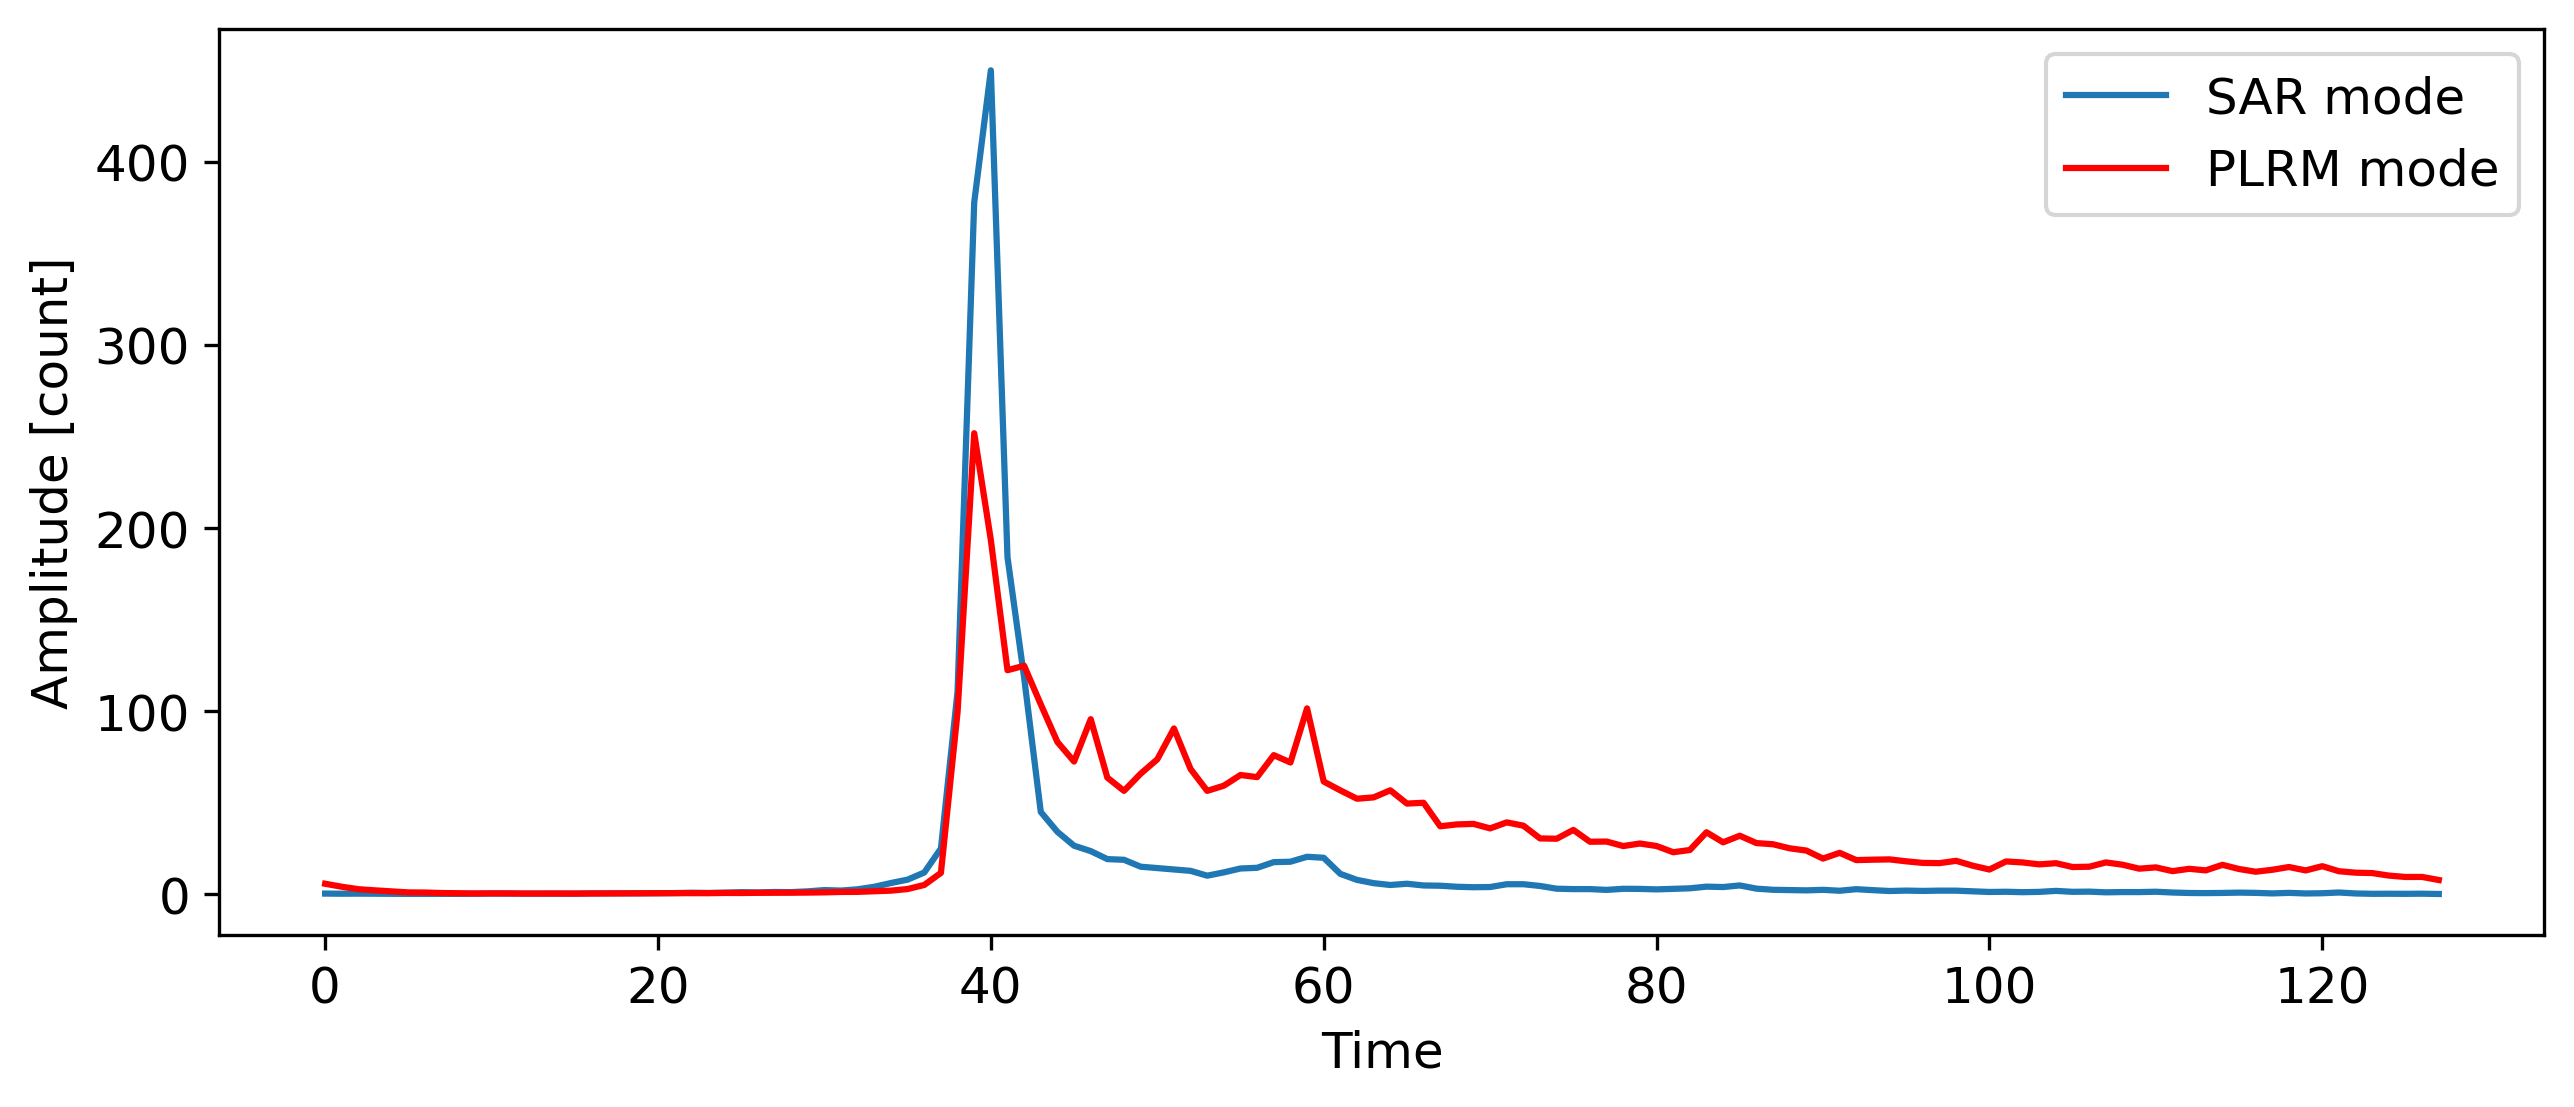

In [4]:
fig = plt.figure(figsize=(10, 4), dpi=300)
ax = plt.subplot(1,1,1)
p1, = ax.plot(ds["echo_sample_ind"], ds["waveform_20_ku"][3000,:], label='SAR mode')
p2, = ax.plot(ds["echo_sample_ind"], ds["waveform_20_plrm_ku"][3000,:],'r', label='PLRM mode')
plt.xlabel('Time')
plt.ylabel('Amplitude [count]')

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels)
plt.show()

<div class="alert alert-info" role="alert">

## <a id='section3'></a>3. Waveform changes by surface class
[Back to top](#TOC_TOP)

</div>

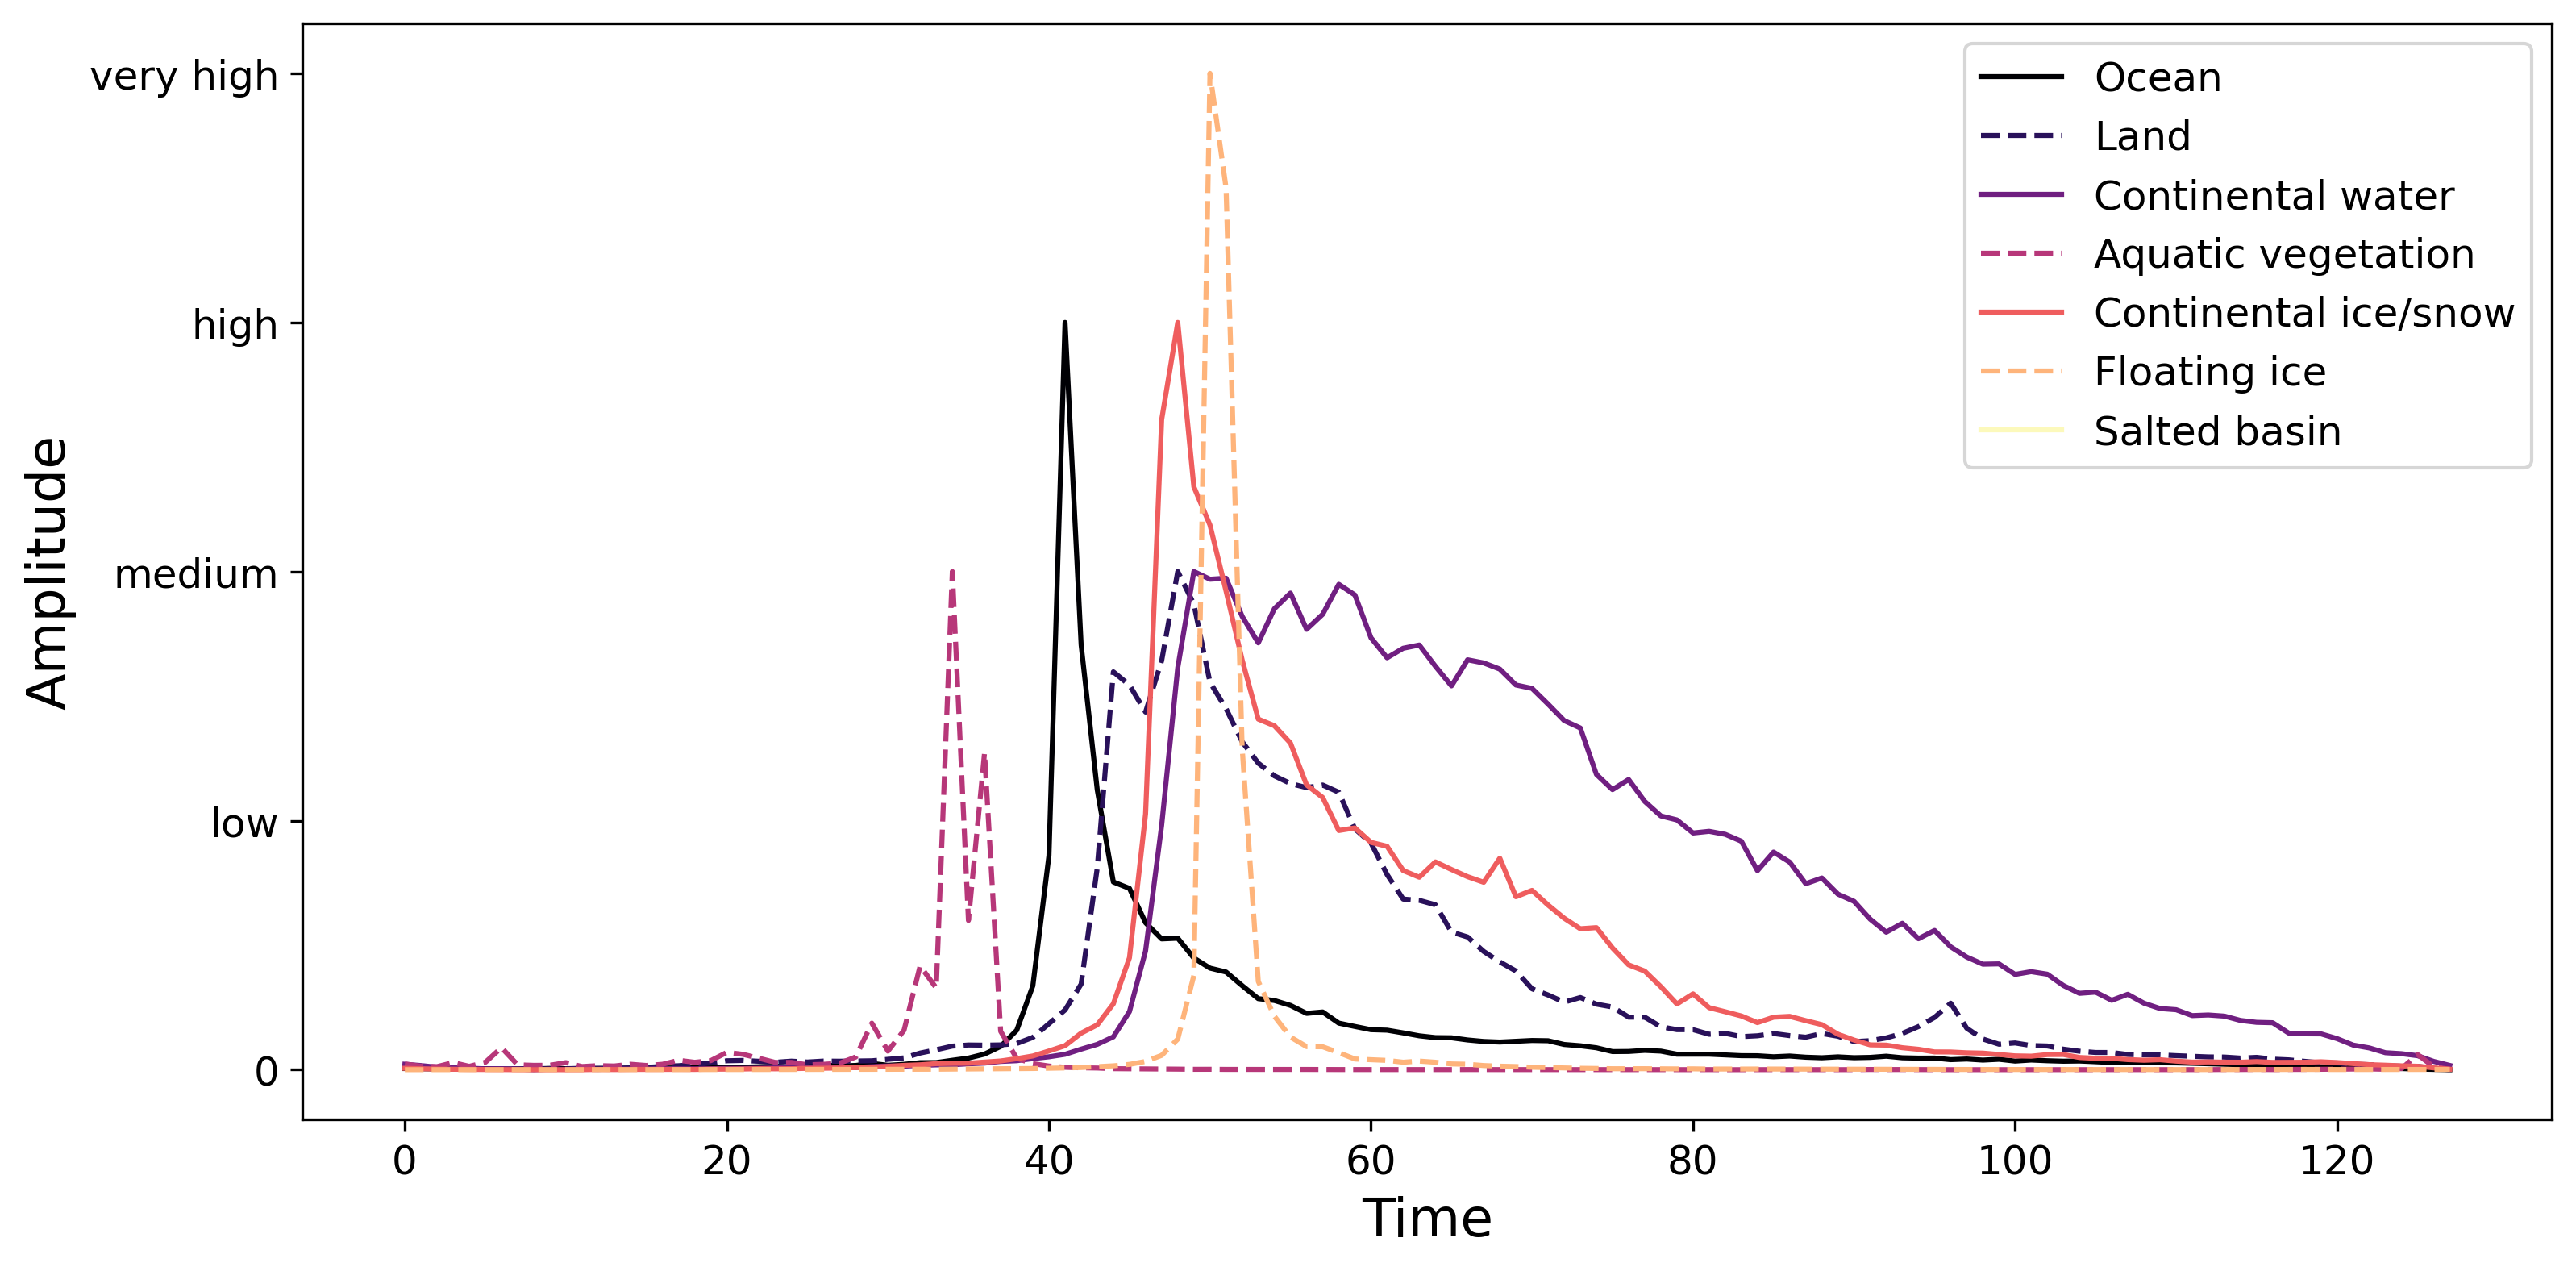

In [5]:
fig = plt.figure(figsize=(12, 6), dpi=300)

surf = np.array(ds["surf_class_20_ku"])
wf = np.array(ds["waveform_20_ku"])
cmap = plt.cm.magma
Xvals = ds["echo_sample_ind"]

p1, = plt.plot(Xvals, norm(np.nanmean(wf[np.where(surf == 0)[0][0:5], :], axis=0)), c=cmap(0))
p2, = plt.plot(Xvals, norm(np.nanmean(wf[np.where(surf == 1)[0][0:5], :], axis=0)), c=cmap(0.16), linestyle='--')
p3, = plt.plot(Xvals, norm(np.nanmean(wf[np.where(surf == 2)[0][0:5], :], axis=0)), c=cmap(0.33))
p4, = plt.plot(Xvals, norm(np.nanmean(wf[np.where(surf == 3)[0][0:5], :], axis=0)), c=cmap(0.5), linestyle='--')
p5, = plt.plot(Xvals, norm(np.nanmean(wf[np.where(surf == 4)[0][0:5], :], axis=0)), c=cmap(0.66))
p6, = plt.plot(Xvals, norm(np.nanmean(wf[np.where(surf == 5)[0][0:5], :], axis=0)), c=cmap(0.84), linestyle='--')
p7, = plt.plot(Xvals, norm(np.nanmean(wf[np.where(surf == 6)[0][0:5], :], axis=0)), c=cmap(0.99))

plt.yticks([0,1,2,3,4], ["0","low","medium","high","very high"])
plt.xlabel('Time', fontsize=16)
plt.ylabel('Amplitude',  fontsize=16)
plt.legend([p1, p2, p3, p4, p5, p6, p7],
           ['Ocean', 'Land', 'Continental water',
            'Aquatic vegetation', 'Continental ice/snow',
            'Floating ice', 'Salted basin'])
plt.show()

Plot along track...

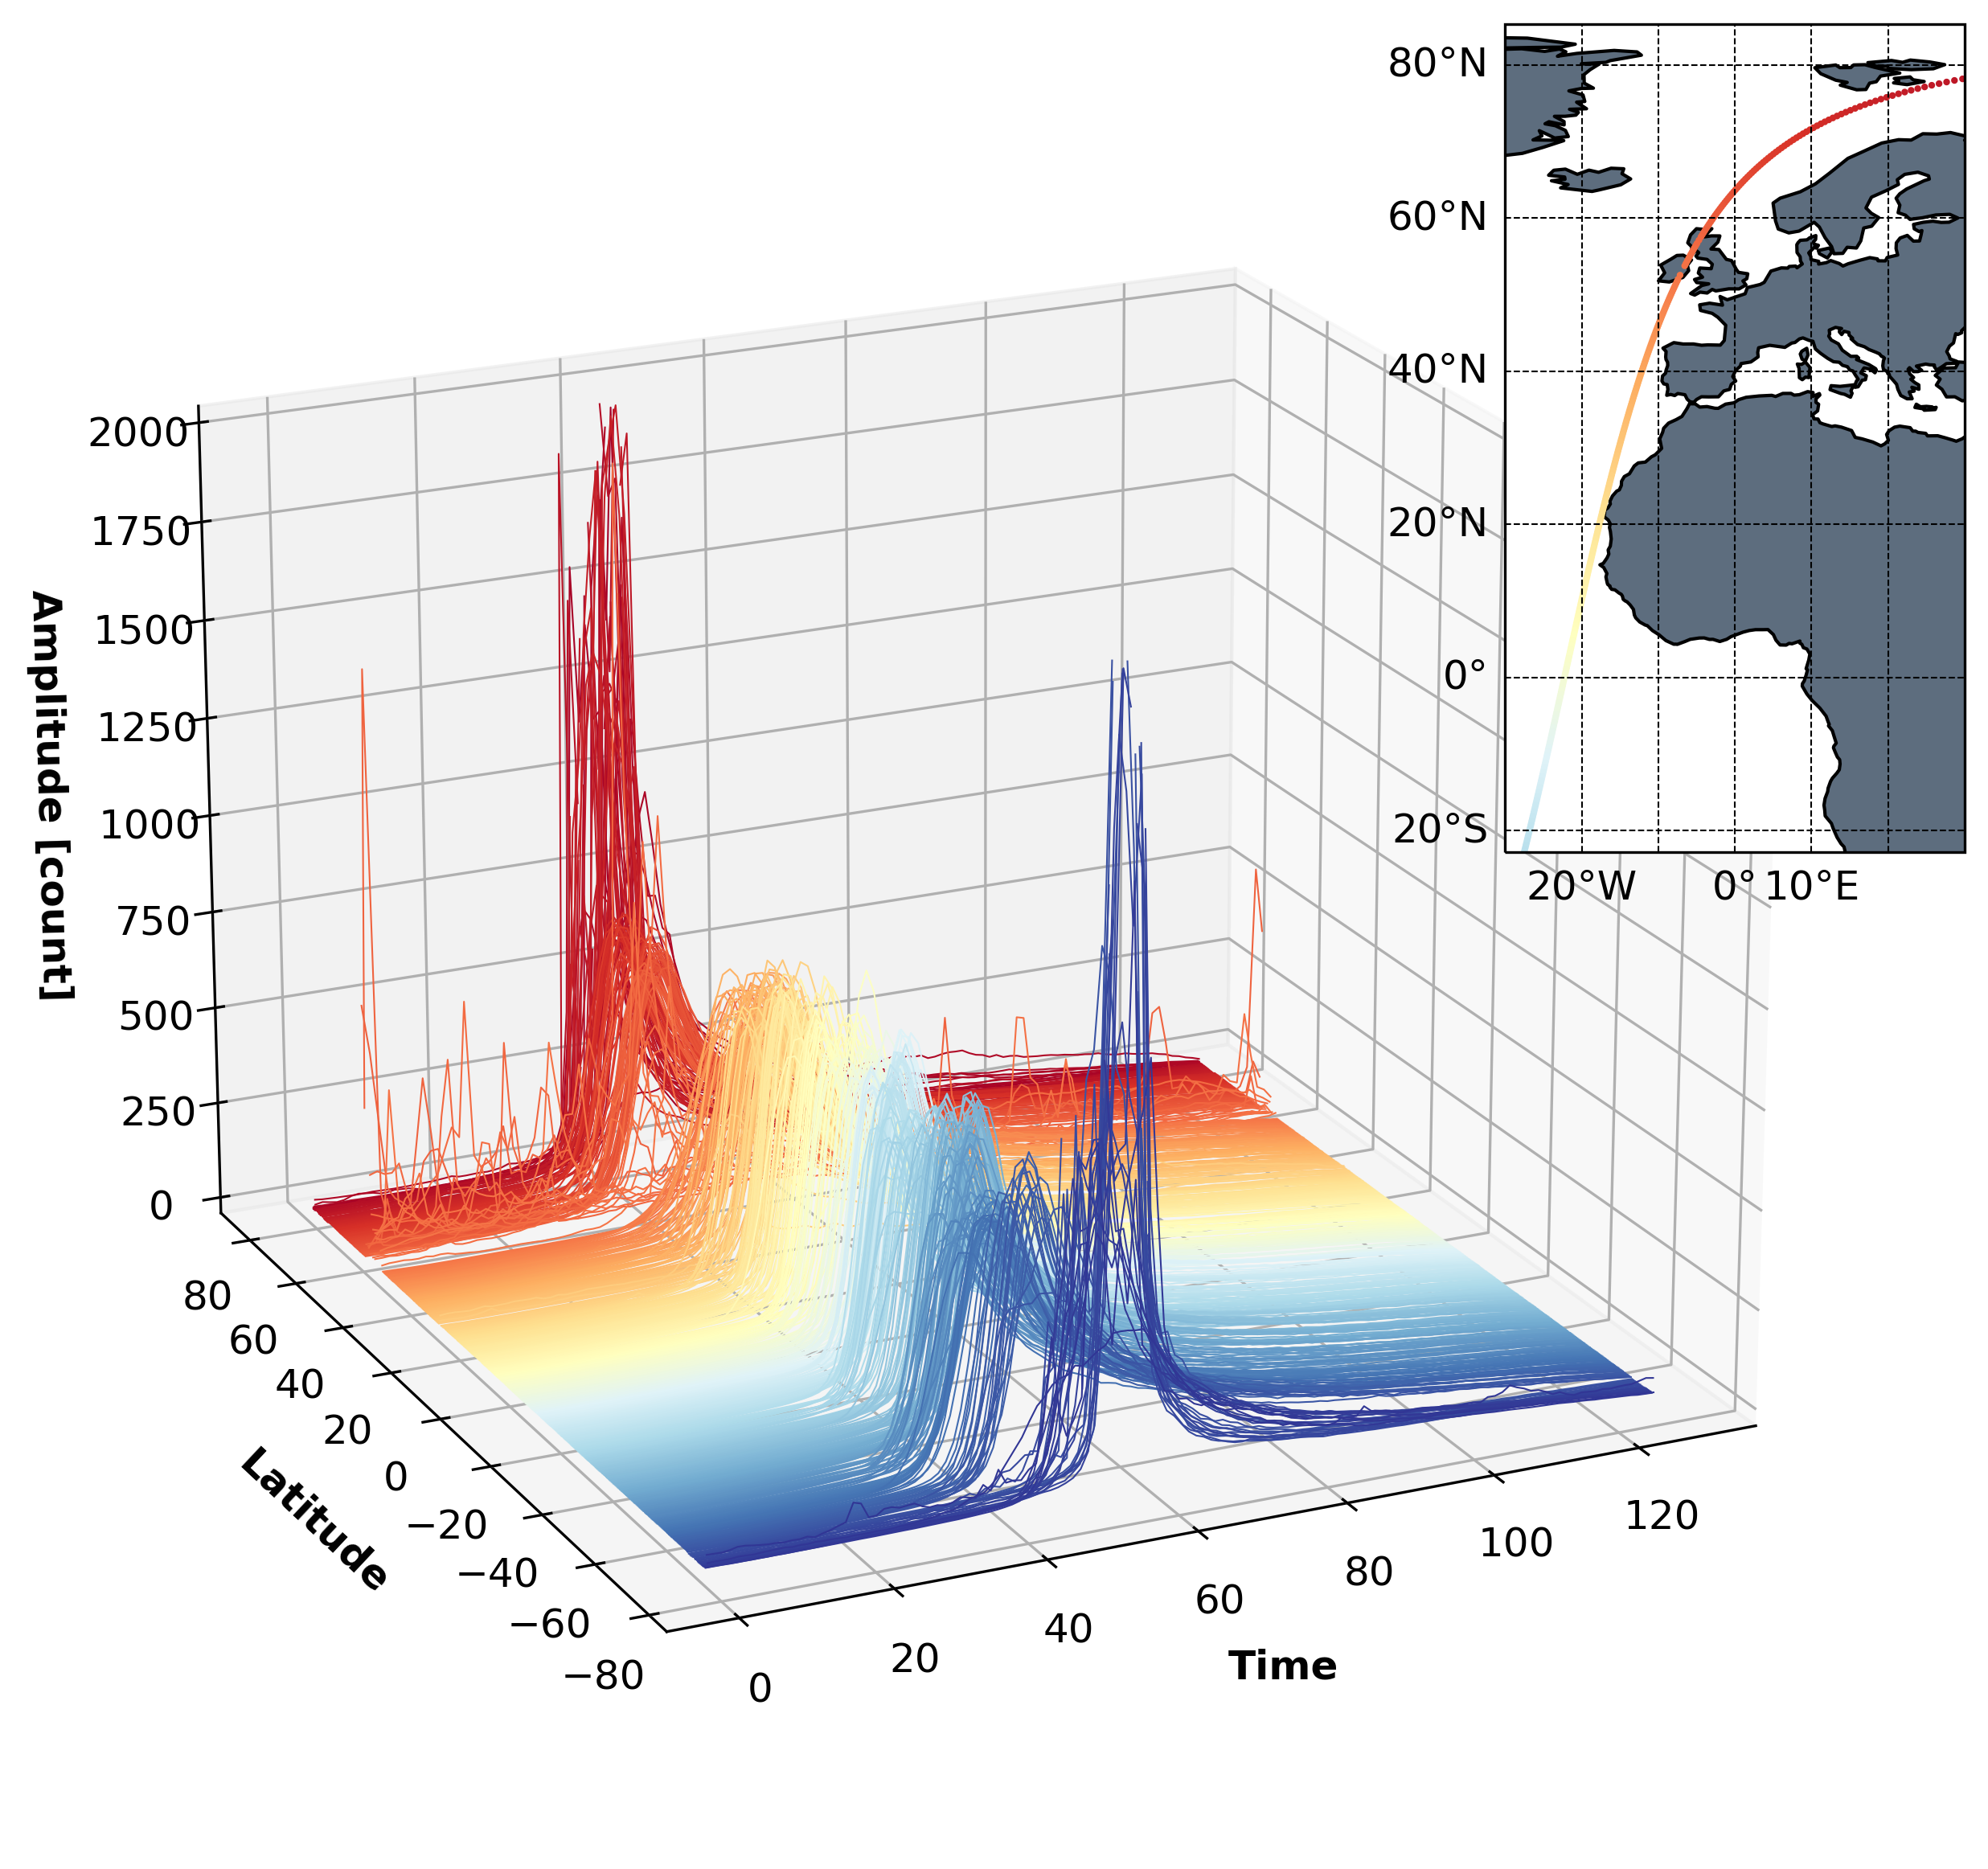

In [6]:
fig = plt.figure(figsize=(12, 10), dpi=300)
ax1 = fig.add_subplot(1, 1, 1, projection='3d')

cap = 2000
stride = 100
counter = int(np.shape(ds["waveform_20_ku"])[0]/stride)
waveform_array = np.zeros((counter, len(ds["echo_sample_ind"])))
lon_array = []
lat_array = []
cmap = plt.cm.RdYlBu

all_lons = ds["lon_20_ku"]
all_lons[all_lons > 180] = all_lons[all_lons > 180] - 360
all_lats = ds["lat_20_ku"]

for ii in range(counter):
    waveform_array[ii, :] = np.nanmean(ds["waveform_20_ku"][ii*stride:(ii+1)*stride, :], axis=0)
    waveform_array[waveform_array > cap] = np.nan
    lons = np.nanmean(all_lons[ii*stride:(ii+1)*stride])
    lats = np.nanmean(all_lats[ii*stride:(ii+1)*stride])
    lon_array.append(lons)
    lat_array.append(lats)
    p1, = ax1.plot3D(ds["echo_sample_ind"], np.ones(len(ds["echo_sample_ind"]))*lats,
                    waveform_array[ii, :], color=cmap(ii/counter), linewidth=0.5, zorder=counter)

ax1.set_zlim([0, cap])
ax1.view_init(elev=20, azim=245)
ax1.set_xlabel('Time', fontweight='bold', labelpad=10)
ax1.set_ylabel('Latitude', fontweight='bold', labelpad=10)
ax1.set_zlabel('Amplitude [count]', fontweight='bold', labelpad=10)

ax2 = fig.add_subplot(2, 3, 3, projection=cartopy.crs.PlateCarree())
ax2.scatter(lon_array, lat_array, 1, range(len(lon_array)), cmap=cmap)
ax2.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='k', facecolor='#5D6D7E')
g1 = ax2.gridlines(draw_labels = True, zorder=20, color='0.0', linestyle='--', linewidth=0.5)
g1.top_labels = False
g1.right_labels = False
g1.xlabel_style = {'color': 'black'}
g1.ylabel_style = {'color': 'black'}
ax2.set(facecolor = "1.0")
ax2.set_extent([-30, 30, -20, 85])
plt.savefig('1_5_SRAL_waveforms.png')

<hr>
<a href="../Index.ipynb"><< Index</a>
<br>
<a href="./1_4_SRAL_tracks.ipynb"><< SRAL tracks</a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="./1_6_SRAL_SSHA.ipynb">SRAL sea surface height anomalies >></a>
<hr>
<a href="https://gitlab.eumetsat.int/eumetlab/ocean">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int>Contact helpdesk for support </a> | <a href=mailto:Copernicus.training@eumetsat.int>Contact our training team to collaborate on and reuse this material</a></span></p>